# Predicting Nutrional Grade
### *by Raymond Nguyen, Jeremy Yang*

For the scope of this project, we will be classifying nutritional grade based on the <a href="https://www.kaggle.com/openfoodfacts/world-food-facts/data">Open Food Facts</a> dataset on Kaggle. The data is included in a tsv file with about 163 features and 356027 indexes.  A range of models will be explored and accuracy will be scored on Precision and Recall scores.

## The Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
food = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)

In [3]:
pd.set_option('max_columns', 163)
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

Looking at the head of the data, we can see that there are a lot of null values in the dataset.  This will require a lot of cleaning.  In addition, alot of these features seem to be not relevant to our future model.

In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


Looking at the info of the dataset,  we can see that the majority of the features are numerical (about 100) and about 50 of the features are categorical.

In [5]:
pd.set_option('max_columns', 163)
food.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,263823.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,27.000000,26.000000,0.0,0.0,1.0,0.0,23040.000000,23075.000000,938.000000,201.000000,43.000000,89.000000,207.000000,159.000000,9.000000,27.000000,26.000000,25.000000,15.000000,0.0,1.600000e+01,0.0,0.0,0.0,143443.000000,144170.000000,2.792200e+05,279186.000000,85.000000,32.000000,44.000000,278.000000,6.00000,11.000000,291.000000,451.000000,2.206830e+05,2.941610e+05,29.000000,17.000000,9.000000,289739.000000,289694.000000,4577.000000,137706.000000,35.000000,7207.000000,1472.000000,930.000000,141060.000000,11277.000000,10925.000000,11831.000000,6897.000000,5330.000000,3046.000000,5.390000e+03,331.000000,2551.000000,73.000000,99.000000,24848.000000,198.000000,141517.000000,5938.000000,140660.000000,6392.000000,3964.000000,2122.000000,1639.000000,99.000000,1181.000000,23.000000,20.000000,288.000000,91.000000,33.000000,52.000000,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,5.092460,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.383852,10.265385,NaN,NaN,61.0,NaN,10.501218,6.372548,3.476176,2.200218,2.805791,1.581979,18.734295,12.463013,0.051344,0.158230,0.063246,41.243200,26.053333,NaN,1.343750e-06,NaN,NaN,NaN,0.073487,0.020065,5.614020e+04,15.673428,12.822353,2.864063,24.836364,6.007263,17.10000,12.163636,30.943230,49.098894,3.843467e+05,5.326598e+04,4.398966,2.400000,0.021678,1.941281,0.764401,8.278337,0.000398,0.503896,0.000008,0.053610,0.033854,0.023394,0.332167,0.256490,0.020410,0.046952,0.006820,0.205586,2.741797e-04,0.000134,0.069210,0.433009,0.132496,0.424284,0.079895,0.127284,0.613267,0.003791,0.531415,0.007921,0.025613,0.003165,0.010042,0.003098,0.001478,0.000230,0.000465,2.075503,12.262055,6.476138,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.9

## Data Cleaning

In this step, we will deal with the null values in the dataset and select some features we find to be relevant.

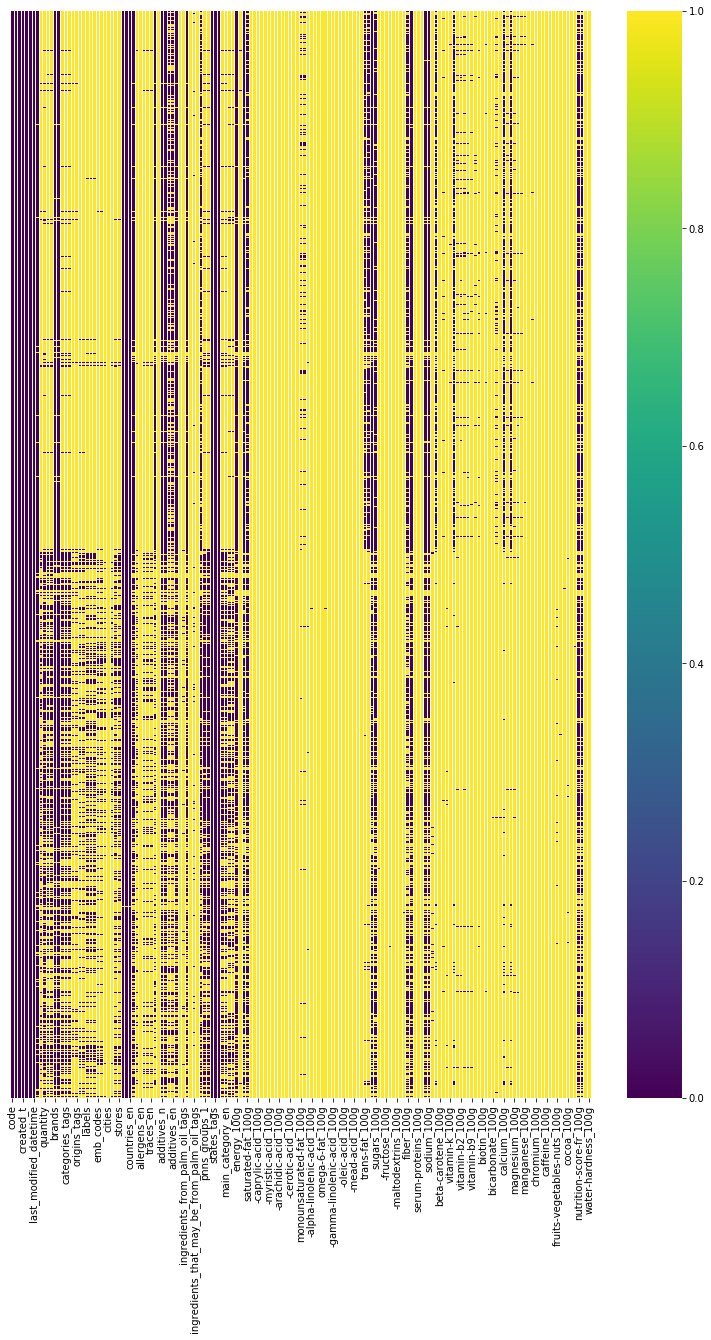

In [6]:
plt.figure(figsize=(13, 20))
sns.heatmap(food.isnull(), yticklabels=False, cmap='viridis')

The yellow indicates the null values and the purple indicates the values that are not null. We choose to discard features that are more than 50% null because these variables can be inconsistent, but first, let's check the distribution of our target label, `nutrition_grade_fr` and the amount of null values in it.

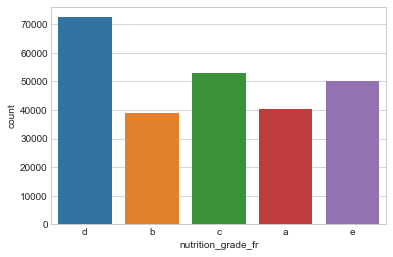

In [7]:
sns.set_style('whitegrid')
sns.countplot(food['nutrition_grade_fr'])

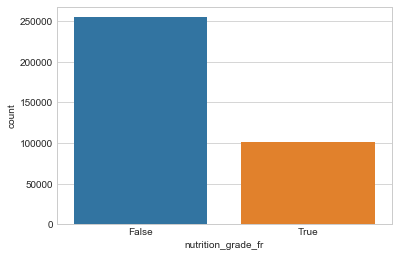

In [8]:
sns.countplot(food['nutrition_grade_fr'].isnull())

It seems that about 10000 indexes are null and the rest of the labels have values.  The distribution of the `nutrition_grade_fr` seems to be about even, except for grade D.  Let's remove the features with a majority of null values now.

In [9]:
def removeNullFeat(data, percent):
    null_percentage = data.isnull().mean(axis=0)
    null_features_removed = [null_percentage.index[i] for i in range(len(null_percentage)) if null_percentage[i] > percent]
    return data.drop(null_features_removed, axis=1)

In [10]:
food_removed_null = removeNullFeat(food, 0.5)
food_removed_null.shape

(356027, 34)

We've removed 129 features at this point, but there are still some features that do not add any information to the prediction.  Let's remove those.

In [11]:
food_removed_null.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_en', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [12]:
unwanted_features = ["code", "url","states_en", "countries_tags", "additives", "brands",
                     "last_modified_datetime", "creator", "states", "states_tags", 
                     "ingredients_text", "created_datetime", "serving_size", "created_t", 
                     "nutrition-score-uk_100g", "countries", "last_modified_t", 
                     "brands_tags", "ingredients_that_may_be_from_palm_oil_n"]

food_removed_feat = food_removed_null.drop(unwanted_features, axis=1)

Now that we've got our desired relevant features, we impute the numerical features with 0 and the categorical features with an "Unknown" string.

In [13]:
def imputeNulls(data, label):
    data = data.copy()
    for col in data.columns:
        if data[col].dtype == 'float64':
            data[col].fillna(0, inplace=True)
        elif data[col].dtype == 'object' and col != label:
            data[col].fillna('Unknown', inplace=True)
    return data

In [14]:
food_imputed = imputeNulls(food_removed_feat, 'nutrition_grade_fr')

## Exploratory Data Analysis on the Supervised Set

Now that we've cleaned our data, we will split the data into 2 datasets, one where we know the labels and one where we don't know the labels.  We will build our future model on the supervised set and use this model to predict values for the unsupervised set.

In [15]:
food_supervised = food_imputed[food_imputed['nutrition_grade_fr'].notnull()]
food_unsupervised = food_imputed[food_imputed['nutrition_grade_fr'].isnull()]

In [16]:
food_supervised.head()

,product_name,countries_en,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,Banana Chips Sweetened (Whole),United States,0.0,0.0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,Peanuts,United States,0.0,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,Organic Salted Nut Mix,United States,0.0,0.0,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
7,Organic Muesli,United States,1.0,0.0,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0
12,Zen Party Mix,United States,0.0,0.0,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0


Now that we've separated our datasets, let's check for outliers with boxplots.

In [18]:
numerical_features = list(food_supervised.select_dtypes(include=['float64']).columns)
cat_features = list(food_supervised.select_dtypes(include=['object']).drop('nutrition_grade_fr', axis=1).columns)

In [19]:
def boxPlots(feature_list, label):
    for i, feat in enumerate(feature_list):
        plt.figure(i)
        sns.boxplot(x=label, y=feat, data=food_supervised)

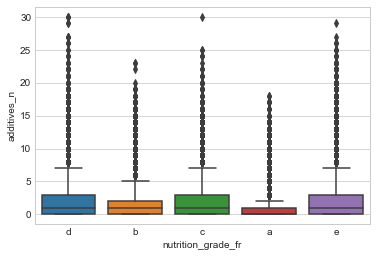

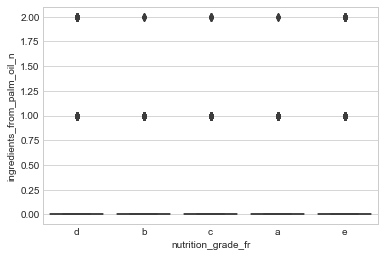

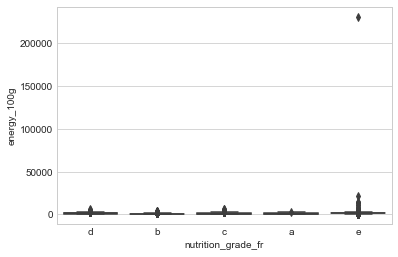

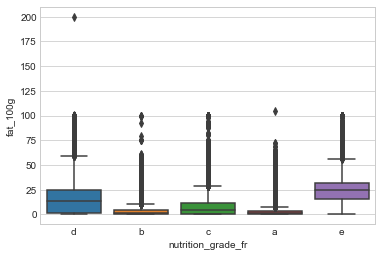

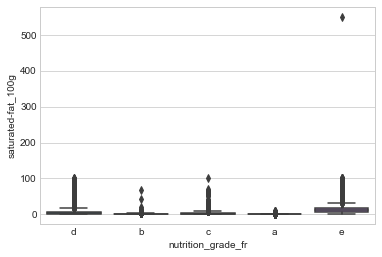

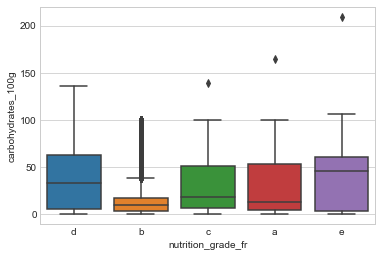

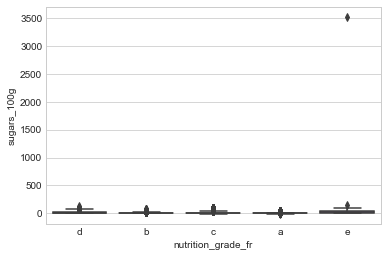

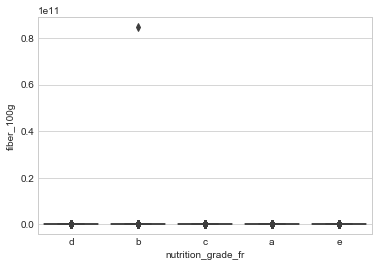

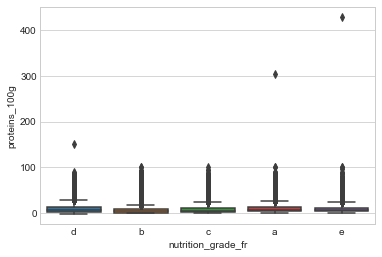

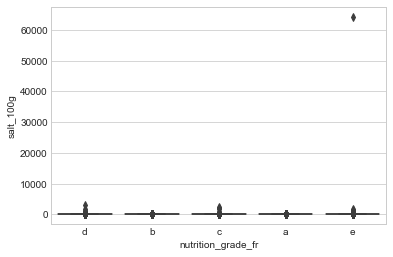

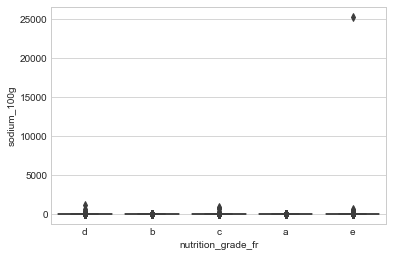

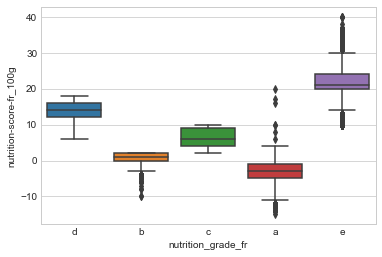

In [20]:
boxPlots(numerical_features, 'nutrition_grade_fr')

We can see that there are outliers in `energy_100g`, `saturated-fat_100g`, `sugars_100g`, `fiber_100g`, `proteins_100g`, `salt_100g` and `sodium_100g`.  Also it should be noted that protein seems to have some negative values. Let's replace the outliers with the median.

In [21]:
food_supervised.loc[food_supervised['energy_100g'] > 50000, 'energy_100g'] = np.median(food_supervised['energy_100g'])
food_supervised.loc[food_supervised['saturated-fat_100g'] > 200, 'saturated-fat_100g'] = np.median(food_supervised['saturated-fat_100g'])
food_supervised.loc[food_supervised['sugars_100g'] > 150, 'sugars_100g'] = np.median(food_supervised['sugars_100g'])
food_supervised.loc[food_supervised['fiber_100g'] > 0.2, 'fiber_100g'] = np.median(food_supervised['fiber_100g'])
food_supervised.loc[food_supervised['proteins_100g'] > 200, 'proteins_100g'] = np.median(food_supervised['proteins_100g'])
food_supervised.loc[food_supervised['salt_100g'] > 1000, 'salt_100g'] = np.median(food_supervised['salt_100g'])
food_supervised.loc[food_supervised['sodium_100g'] > 5000, 'sodium_100g'] = np.median(food_supervised['sodium_100g'])
food_supervised.loc[food_supervised['proteins_100g'] < 0, 'proteins_100g'] = np.median(food_supervised['proteins_100g'])

/Users/Raymond/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


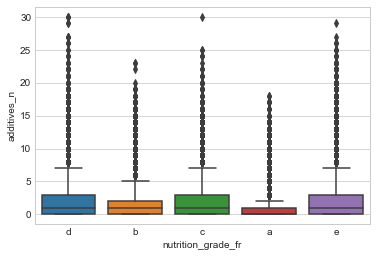

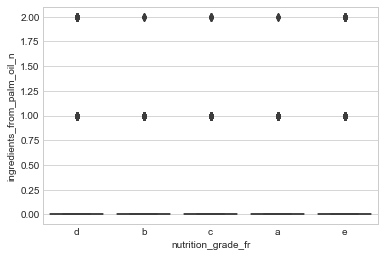

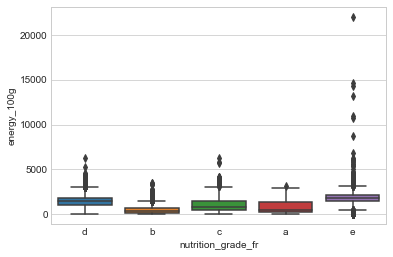

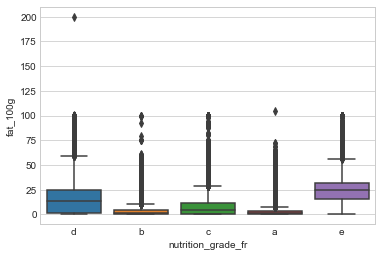

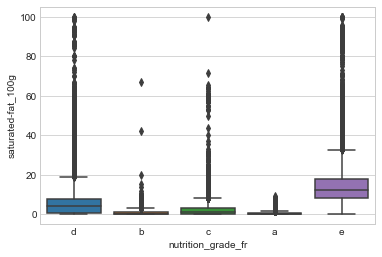

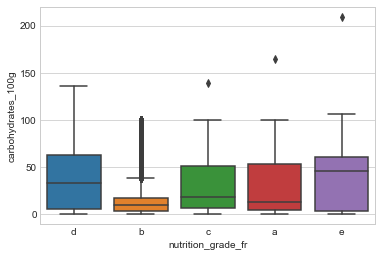

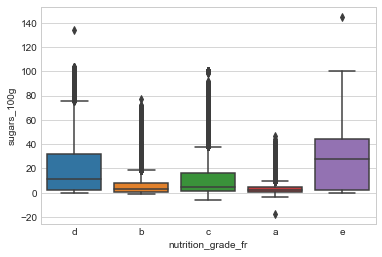

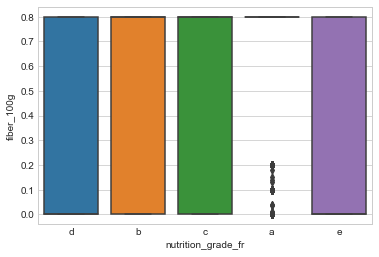

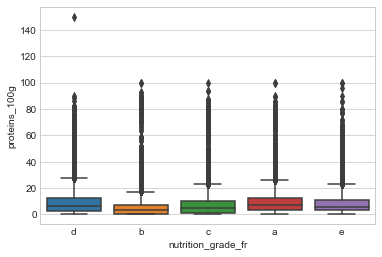

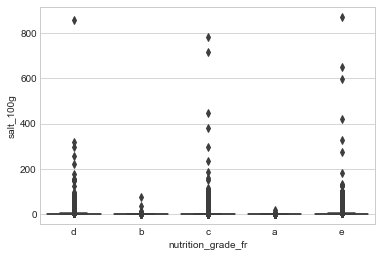

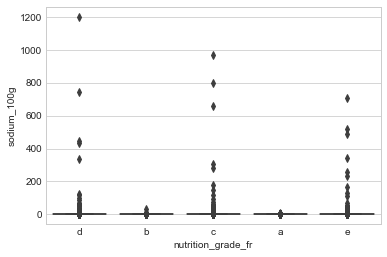

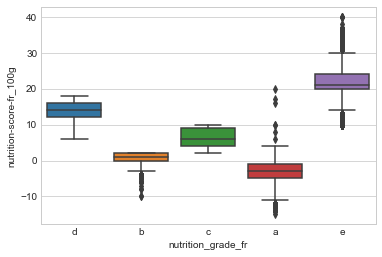

In [22]:
boxPlots(numerical_features, 'nutrition_grade_fr')

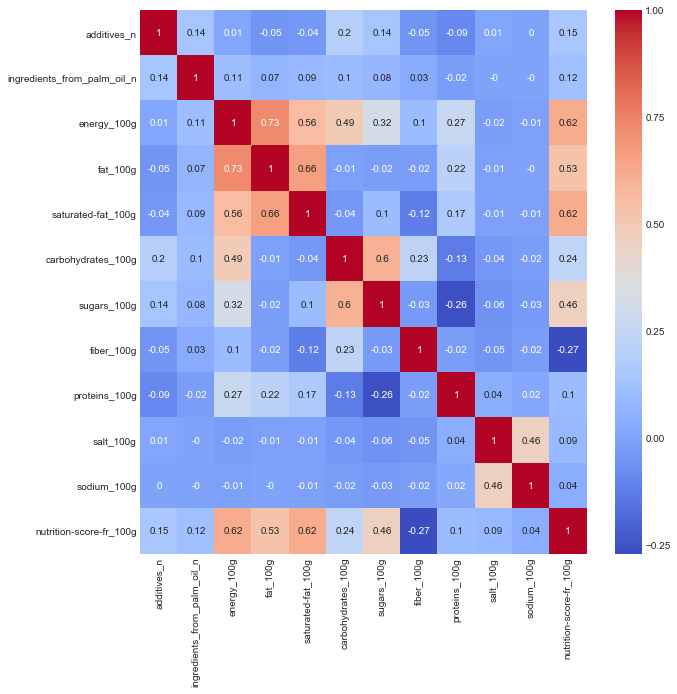

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(food_supervised.corr().round(2), annot=True, cmap='coolwarm')

Looking at the correlation matrix, it seems that energy_100g and fat_100g are the most correlated.  This makes sense because fat provides the most calories out of all the macronutrients.  Now let's look at the distributions of some of the variables and drop some variables that don't really add a lot of information.

In [24]:
food_supervised.columns

Index(['product_name', 'countries_en', 'additives_n',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

### Nutrition_grade_fr

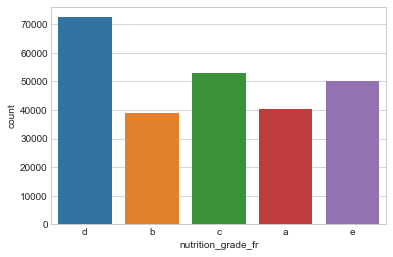

In [25]:
sns.countplot(food_supervised['nutrition_grade_fr'])

There appears to be a lot more grade D's than any other grade.

### Countries_en

In [26]:
print(food_supervised['countries_en'].nunique())
print(food_unsupervised['countries_en'].nunique())

563
423


There are about 563 countries in the supervised set and 423 countries in the unsupervised set. Let's take a look at the top 5 countries in the dataset and check for significance.

In [27]:
food_supervised['countries_en'].value_counts()[0:5]

United States    139076
France            89045
Switzerland        8865
Germany            4813
Spain              2564
Name: countries_en, dtype: int64

In [28]:
usa = food_supervised[food_supervised['countries_en'] == 'United States']['nutrition_grade_fr'].value_counts()
france = food_supervised[food_supervised['countries_en'] == 'France']['nutrition_grade_fr'].value_counts()
switzerland = food_supervised[food_supervised['countries_en'] == 'Switzerland']['nutrition_grade_fr'].value_counts()
germany = food_supervised[food_supervised['countries_en'] == 'Germany']['nutrition_grade_fr'].value_counts()
spain = food_supervised[food_supervised['countries_en'] == 'Spain']['nutrition_grade_fr'].value_counts()

In [29]:
contingence_countries = pd.DataFrame({'usa': pd.Series(usa, index=usa.index), 
                                     'france': pd.Series(france, index=france.index), 
                                     'switzerland': pd.Series(switzerland, index=switzerland.index), 
                                     'germany': pd.Series(germany, index=germany.index), 
                                     'spain': pd.Series(spain, index=spain.index)})

In [30]:
contingence_countries

,france,germany,spain,switzerland,usa
a,13977,810,705,1300,21865
b,13272,686,413,1479,21606
c,19242,930,642,2020,27986
d,24964,1335,538,2329,40321
e,17590,1052,266,1737,27298


In [31]:
from scipy.stats import chi2_contingency

In [32]:
chi2, p, dof, expected = chi2_contingency(contingence_countries)
chi2, p, dof

(576.0469908159597, 2.7365112381780825e-112, 16)

The p-value is approximately zero at 2.74e-112.  Countries would have a significant effect on nutrition grade.

### Ingredients_from_palm_oil_n

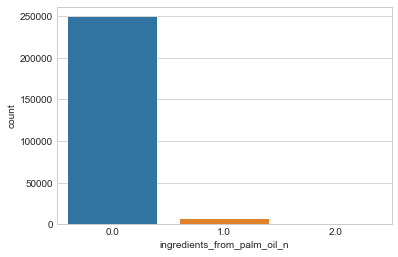

In [33]:
sns.countplot(food_supervised['ingredients_from_palm_oil_n'])

There does not seem to be a lot of foods with ingredients from palm oil.  This feature is probably worth removing.

In [34]:
food_supervised.drop('ingredients_from_palm_oil_n', axis=1, inplace=True)
food_unsupervised.drop('ingredients_from_palm_oil_n', axis=1, inplace=True)

/Users/Raymond/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Raymond/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Energy_100g

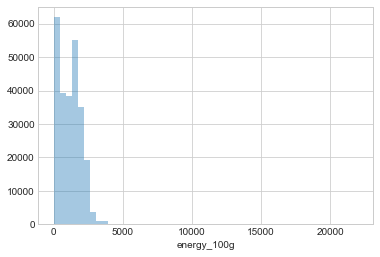

In [35]:
sns.distplot(food_supervised['energy_100g'], kde=False)

### Addictives_n

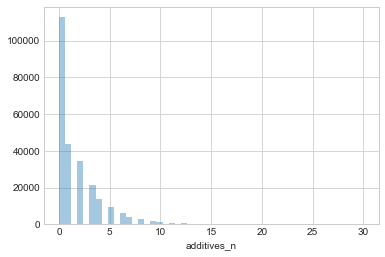

In [36]:
sns.distplot(food_supervised['additives_n'], kde=False)

### Fat_100g

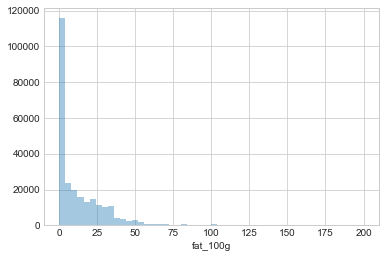

In [37]:
sns.distplot(food_supervised['fat_100g'], kde=False)

### Saturated_fats_100g

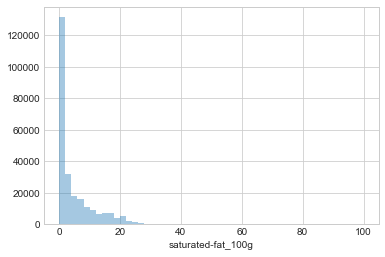

In [38]:
sns.distplot(food_supervised['saturated-fat_100g'], kde=False)

### Carbohydrates_100g

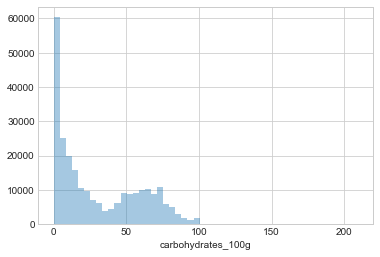

In [39]:
sns.distplot(food_supervised['carbohydrates_100g'], kde=False)

### Sugars_100g

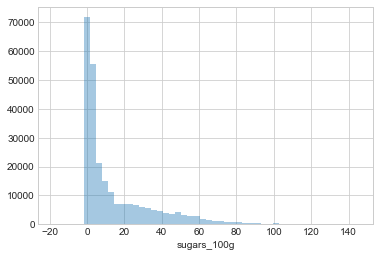

In [40]:
sns.distplot(food_supervised['sugars_100g'], kde=False)

We can see that some foods have negative sugar, which is impossible, so we will set it to zero.

In [41]:
food_supervised.loc[food_supervised['sugars_100g'] < 0, 'sugars_100g'] = 0

/Users/Raymond/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Fibers_100g

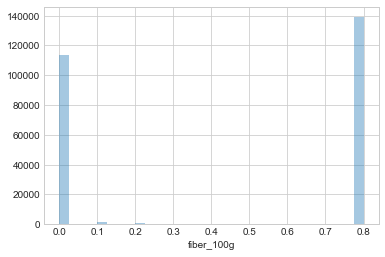

In [42]:
sns.distplot(food_supervised['fiber_100g'], kde=False)

### Proteins_100g

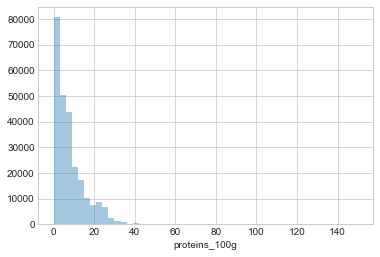

In [43]:
sns.distplot(food_supervised['proteins_100g'], kde=False)

### Salt_100g

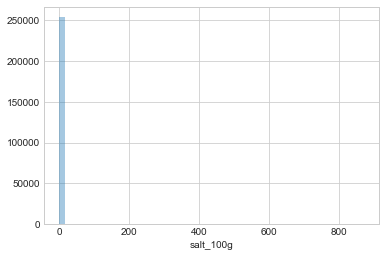

In [44]:
sns.distplot(food_supervised['salt_100g'], kde=False)

In [45]:
food_supervised.groupby('nutrition_grade_fr')['salt_100g'].mean()

nutrition_grade_fr
a    0.328014
b    0.512612
c    1.769119
d    1.655189
e    1.525752
Name: salt_100g, dtype: float64

### Sodium_100g

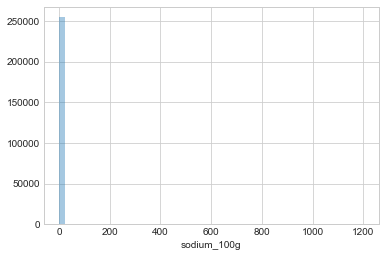

In [46]:
sns.distplot(food_supervised['sodium_100g'], kde=False)

In [47]:
food_supervised.groupby('nutrition_grade_fr')['sodium_100g'].mean()

nutrition_grade_fr
a    0.129139
b    0.201816
c    0.742312
d    0.690609
e    0.634821
Name: sodium_100g, dtype: float64

It seems like foods that are higher in sodium or and salt tend to be lower grades.

### Product Names

This feature does not add any information to the model, so we'll just remove it.

In [48]:
food_supervised.drop('product_name', axis=1, inplace=True)
food_unsupervised.drop('product_name', axis=1, inplace=True)

/Users/Raymond/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Raymond/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Feature Engineering

In [49]:
food_supervised.head()

,countries_en,additives_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,United States,0.0,d,2243.0,28.57,28.57,64.29,14.29,0.8,3.57,0.00000,0.000,14.0
2,United States,0.0,b,1941.0,17.86,0.00,60.71,17.86,0.8,17.86,0.63500,0.250,0.0
3,United States,0.0,d,2540.0,57.14,5.36,17.86,3.57,0.8,17.86,1.22428,0.482,12.0
7,United States,1.0,c,1833.0,18.75,4.69,57.81,15.62,0.8,14.06,0.13970,0.055,7.0
12,United States,0.0,d,2230.0,36.67,5.00,36.67,3.33,0.8,16.67,1.60782,0.633,12.0


### Grouping Countries Together

Since there are 563 total unique countries in the dataset and most of the food is from either the US, France, Switzerland, Germany, or Spain, we will group the rest of the countries into an "Other" category.

In [65]:
food_supervised['countries_en'] = food_supervised['countries_en'].map(lambda x: 'Other' if x not in ['United States', 'France', 'Switzerland', 'Germany', 'Spain'] else x)
food_unsupervised['countries_en'] = food_unsupervised['countries_en'].map(lambda x: 'Other' if x not in ['United States', 'France', 'Switzerland', 'Germany', 'Spain'] else x)

/Users/Raymond/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Raymond/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Ratios

Experimenting with the features, we found that adding certain ratios to the data improved the performance of the overall model.  The overall idea is that we wanted to make ratios of good nutrients over bad nutrients and vice versa.  Here are the ratios we found to have good predictive power.:

Note: We added 0.1 to the denominators to avoid divide by zero errors.

**protein_carb_ratio** = $\frac{Protein}{Carb + 0.1}$

* We opted for protein and carbohydrates ratio because these are two of the main macronutrients of many foods.  It has been researched that a higher protein diet is more effective in improving body composition.
    * https://academic.oup.com/jn/article/133/2/411/4687883

**sugars_sodium_fats_over_fiber** = $\frac{Sugars + Sodium + Saturated\space Fats}{Fiber + 0.1}$

* For this feature, we decided to take nutrients that were generally seen as bad nutrients and placed it over fiber.  Salt Intakes and Sugar intakes have been linked with higher rates of obesity and higher blood pressures. High fiber intakes are associated with lower serum cholesterol concentrations, lower risk of coronary heart disease, reduced blood pressure, enhanced weight control, better glycemic control, reduced risk of certain forms of cancer, and improved gastrointestinal function.
    * https://academic.oup.com/ajcn/article/59/5/1242S/4732592
    * http://hyper.ahajournals.org/content/57/4/676#ref-8
    * http://ucelinks.cdlib.org:8888/sfx_local?sid=google&auinit=IJ&aulast=Brown&atitle=Blood+Pressure+Research,+G.(2011).+Sugar-sweetened+beverage,+sugar+intake+of+individuals,+and+their+blood+pressure:+international+study+of+macro/micronutrients+and+blood+pressure&title=Hypertension&volume=57&issue=4&spage=695&issn=0194-911X
    

**fibers_saturated_fat_ratio** = $\frac{Fiber}{Saturated\space Fats + 0.1}$

* As mentioned above, fiber has been linked with many beneficial health effects.  Saturated fat intake has been linked to an increased risk of cardiovascular disease (CVD), and this effect is thought to be mediated primarily by increased concentrations of LDL cholesterol.
    * https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2824150/

In [ ]:
food_supervised.loc[:, 'protein_carb_ratio'] = food_supervised['proteins_100g'] / (food_supervised['carbohydrates_100g'] + 0.1)
food_supervised.loc[:, 'sugars_sodium_fats_over_fiber'] = (food_supervised['sugars_100g'] + food_supervised['sodium_100g'] + food_supervised['saturated-fat_100g']) / (food_supervised['fiber_100g'] + 0.1)
food_supervised.loc[:, 'fibers_saturated_fat_ratio'] = food_supervised['fiber_100g'] / (food_supervised['saturated-fat_100g'] + 0.1)

In [ ]:
food_unsupervised.loc[:,'protein_carb_ratio'] = food_unsupervised['proteins_100g'] / (food_unsupervised['carbohydrates_100g'] + 0.1)
food_unsupervised.loc[:,'sugars_sodium_fats_over_fiber'] = (food_unsupervised['sugars_100g'] + food_unsupervised['sodium_100g'] + food_unsupervised['saturated-fat_100g']) / (food_unsupervised['fiber_100g'] + 0.1)
food_unsupervised.loc[:,'fibers_saturated_fat_ratio'] = food_unsupervised['fiber_100g'] / (food_unsupervised['saturated-fat_100g'] + 0.1)

# Preprocessing

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [54]:
food_supervised.head()

,countries_en,additives_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,protein_carb_ratio,sugars_sodium_fats_over_fiber,fibers_saturated_fat_ratio
1,United States,0.0,d,2243.0,28.57,28.57,64.29,14.29,0.8,3.57,0.00000,0.000,14.0,0.055443,47.622222,0.027904
2,United States,0.0,b,1941.0,17.86,0.00,60.71,17.86,0.8,17.86,0.63500,0.250,0.0,0.293702,20.122222,8.000000
3,United States,0.0,d,2540.0,57.14,5.36,17.86,3.57,0.8,17.86,1.22428,0.482,12.0,0.994432,10.457778,0.146520
7,United States,1.0,c,1833.0,18.75,4.69,57.81,15.62,0.8,14.06,0.13970,0.055,7.0,0.242791,22.627778,0.167015
12,United States,0.0,d,2230.0,36.67,5.00,36.67,3.33,0.8,16.67,1.60782,0.633,12.0,0.453359,9.958889,0.156863


Due to the constraints of the Nutrionix API chosen, we cannot include countries, and additives in the implementation part of the project.  Therefore we will drop those from the features.  Salt and Sodium have higher correlation with each other, so we will drop that also.

In [55]:
X = food_supervised.drop(['nutrition_grade_fr', 
                          'nutrition-score-fr_100g', 
                          'countries_en', 'additives_n', 
                          'salt_100g'], axis=1)
y = food_supervised['nutrition_grade_fr']
test = food_unsupervised.drop(['nutrition_grade_fr', 
                               'nutrition-score-fr_100g', 
                               'countries_en', 
                               'additives_n', 
                               'salt_100g'], axis=1)

We standardize the data to make the features similar weights.

In [57]:
ss = StandardScaler()
X[X.columns] = ss.fit_transform(X[X.columns])
test[test.columns] = ss.fit_transform(test[test.columns])

Split the data into a training and testing set.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle

Due to the non linear structure of our data (mostly right skewed features), we opted for to use Random Forest as our model.

In [60]:
def printClassificationErrors(y_test, y_pred):
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))

In [61]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
printClassificationErrors(y_test, y_pred)

Confusion Matrix:
[[10830  1003   187    10    16]
 [  889  9814   849    80   136]
 [   82   681 14196   773   102]
 [   19   122   709 20404   588]
 [   43   200   201   763 13760]]
Classification Report:
             precision    recall  f1-score   support

          a       0.91      0.90      0.91     12046
          b       0.83      0.83      0.83     11768
          c       0.88      0.90      0.89     15834
          d       0.93      0.93      0.93     21842
          e       0.94      0.92      0.93     14967

avg / total       0.90      0.90      0.90     76457

Accuracy Score: 0.9025203709274494


In [62]:
cross_validation = cross_val_score(rfc, X, y, cv=10).mean()
cross_validation

0.88888402582230053

A ten-fold cross-validation gives us an accuracy score of about 89%, which we're happy with.

In [63]:
pickle.dump(rfc, open('random_forest_1.sav', 'wb'))

# Feature Importance

In [64]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
sodium_100g,0.197660
sugars_sodium_fats_over_fiber,0.147686
saturated-fat_100g,0.133492
energy_100g,0.119528
sugars_100g,0.086367
fibers_saturated_fat_ratio,0.069004
proteins_100g,0.065986
fat_100g,0.064623
protein_carb_ratio,0.054043
carbohydrates_100g,0.052642


A look at the feature importances of our random forest model shows us that our ratio sugars, sodium, and saturated fats over fiber is significant in the model.  Most of the top features appear to be nutrients that are generally considered "unhealthy" for individuals.

# Future Things to Improve On

* Parameter fine-tuning through GridSearch
* Ensembling with different classification models
* Stacking
* More Feature Engineering